---
title: Sperner's Lemma - Part 1
author: Apurva Nakade
date: 2025-05-07 17:11:43
categories: [math, combinatorics, graph theory]
execute:
  echo: false
  warning: false
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.io as pio
# pio.renderers.default = "vscode"
import plotly.graph_objects as go


what is sperner's lemma?

Monsky's theorem

baricentric coordinates, delauney triangulations

generating random triangulations

---

I recently encountered [Monsky's theorem](https://en.wikipedia.org/wiki/Monsky%27s_theorem) about the impossibility of dividing the square into an odd number of equal area triangles. It got me thinking about the Sperner's lemma on a long hike I was on. I love doing proofs in my head and I tried recreating the Sperner's proof but could not figure it out no matter what until I realized I was missing the Sperner condition. And once I did that it all fit together perfectly. But for the first time, it also made me see the connection between Sperner's lemma and algebraic topology.

The classical version of Sperner's lemma states the following

::: {.thm-sperners-lemma}

Let $T$ be a triangle subdivided into smaller triangles such that:

1. Each vertex of the subdivision is labeled with one of three labels $1, 2, 3$.
2. The vertices of the outer triangle $T$ are labeled $1, 2, 3$ in some order.
3. Each vertex on an edge of $T$ is labeled with one of the two labels of that edge.

Then, there exists at least one subtriangle in the subdivision whose vertices are labeled with all three labels $1, 2, 3$.

:::

The third condition is the one I was missing - the so called **Sperner condition**. We call the subtriangle with all three colors a **rainbow triangle**. So Sperner's lemma can be stated as saying that for any triangulation of a triangle that satisfies the Sperner condition, there is a rainbow triangle. 


## Barycentric Coordinates

I know the proof, multiple proofs actually, but just for fun I want to see this in action. How do I generated random colorings and random triangulations? It's my old friend barycentric coordinates.

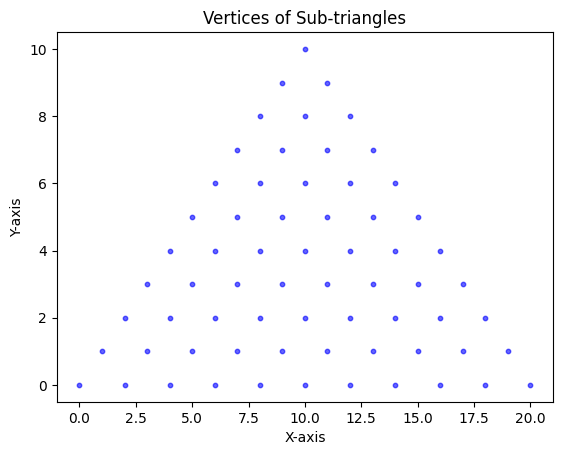

In [2]:
N = 10 

# generate triples of non-negative integers (i, j, k) such that i + j + k = N 
triples = [(i, j, N - i - j) for i in range(N + 1) for j in range(N - i + 1)]

triangle = np.array([[0, 0], [2*N, 0], [N, N]])

# Generate sub-triangles using triples as barycentric coordinates
vertices_regular = np.array([(t[0] / N) * triangle[0] + (t[1] / N) * triangle[1] + (t[2] / N) * triangle[2] for t in triples])

# plot the vertices_regular on the plane
plt.scatter(vertices_regular[:, 0], vertices_regular[:, 1], s=10, c='blue', alpha=0.6)
plt.title("Vertices of Sub-triangles")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [3]:
import plotly.graph_objects as go

class XYSliderPlot:
    def __init__(self, x_range=(0, 10), y_range=(0, 10)):
        """
        Initializes the plot with separate x and y ranges for two independent sliders.

        Parameters:
        - x_range: tuple, range of x values for the horizontal slider
        - y_range: tuple, range of y values for the vertical slider
        """
        self.x_vals = list(range(x_range[0], x_range[1] + 1))
        self.y_vals = list(range(y_range[0], y_range[1] + 1))
        self.fig = go.Figure()
        

        self._add_initial_trace()
        self._add_sliders()

    def _add_initial_trace(self):
        """
        Adds the initial red dot to the plot at the starting x, y position.
        """
        self.dot = go.Scatter(
            x=[self.x_vals[0]],
            y=[self.y_vals[0]],
            mode='markers',
            marker=dict(size=10, color='red'),
            name="Red Dot"
        )
        self.fig.add_trace(self.dot)

    def _add_sliders(self):
        """
        Adds two independent sliders:
        - One for controlling x (horizontal slider)
        - One for controlling y (vertical slider)
        Each slider updates the dot's position.
        """
        # Steps for the x-axis slider
        x_steps = [
            dict(
                method='update',
                args=[{'x': [[self.x_vals[i]]], 'y': [self.y_vals[0]]}, []],
                label=str(self.x_vals[i])
            ) for i in range(len(self.x_vals))
        ]

        # Steps for the y-axis slider
        y_steps = [
            dict(
                method='update',
                args=[{'x': [self.x_vals[0]], 'y': [[self.y_vals[i]]]}, []],
                label=str(self.y_vals[i])
            ) for i in range(len(self.y_vals))
        ]

        # Add sliders to the layout using the proper structure
        self.fig.update_layout(
            sliders=[
                dict(
                    steps=x_steps,
                    active=0,
                    x=0, y=-1, 
                    xanchor="left", yanchor="bottom",  # Positioning x-slider at the bottom center
                    name="x-slider"
                ),
                dict(
                    steps=y_steps,
                    active=0,
                    x=0, y=-1.5, 
                    xanchor="left", yanchor="middle",  # Positioning y-slider to the right center
                    name="y-slider"
                )
            ],
            title="Move the Red Dot with X and Y Sliders",
            xaxis=dict(
                scaleanchor="y",  # This ensures the x-axis and y-axis have the same scale
                range=[min(self.x_vals), max(self.x_vals)]
            ),
            yaxis=dict(
                scaleanchor="x",  # Link the y-axis to the x-axis
                range=[min(self.y_vals), max(self.y_vals)]
            ),
            showlegend=False
        )

    def show(self):
        """
        Displays the interactive plot in a notebook or exported HTML (e.g. Quarto).
        """
        # self.fig.show()
        
        pio.show(self.fig)



# Create and show the plot
plot = XYSliderPlot()
plot.show()
